In [0]:
import os
import librosa
import librosa.display
from os import listdir
from os.path import isfile, join
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
from google.colab import files
import re


In [0]:
from google.colab import drive
#for part where 9 we get our data from google drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#step 2
#for this step we retrieve the data locally, uploading them from the computer

def dataparser(): #you have to upload every time so run this cell once and never speak again about it
  wav=[]
  speakers=[]
  digits=[]
  uploaded = files.upload()
  for fn in uploaded.keys():
    wav.append(librosa.core.load(fn))
    bob=fn.split('.')[0]
    (digit, speaker) = re.findall(r'(\w+?)(\d+)', bob)[0]
    speakers.append(speaker)
    digits.append(digit)
  return (wav, speakers, digits)

(wav, speakers, digits) = dataparser()


Saving eight1.wav to eight1.wav
Saving eight2.wav to eight2.wav
Saving eight3.wav to eight3.wav
Saving eight4.wav to eight4.wav
Saving eight5.wav to eight5.wav
Saving eight6.wav to eight6.wav
Saving eight8.wav to eight8.wav
Saving eight9.wav to eight9.wav
Saving eight10.wav to eight10.wav
Saving eight11.wav to eight11.wav
Saving eight12.wav to eight12.wav
Saving eight13.wav to eight13.wav
Saving eight14.wav to eight14.wav
Saving eight15.wav to eight15.wav
Saving five1.wav to five1.wav
Saving five2.wav to five2.wav
Saving five3.wav to five3.wav
Saving five4.wav to five4.wav
Saving five5.wav to five5.wav
Saving five6.wav to five6.wav
Saving five7.wav to five7.wav
Saving five8.wav to five8.wav
Saving five9.wav to five9.wav
Saving five10.wav to five10.wav
Saving five11.wav to five11.wav
Saving five12.wav to five12.wav
Saving five13.wav to five13.wav
Saving five14.wav to five14.wav
Saving five15.wav to five15.wav
Saving four1.wav to four1.wav
Saving four2.wav to four2.wav
Saving four3.wav t

In [0]:
#step 3

mfccs=[]
delta1=[] #first-order derivative
delta2=[] #second-order derivative
zcr=[] #zero crossing rate

for i in wav:
  mfccs.append(librosa.feature.mfcc(y=i[0], sr=16000, n_mfcc=13, hop_length=int(0.01*16000), n_fft=int(0.025*16000)))
  zcr.append(librosa.feature.zero_crossing_rate(i[0], hop_length=int(0.01*16000)))
  

for i in mfccs:
  delta1.append(librosa.feature.delta(i, order=1))
  delta2.append(librosa.feature.delta(i, order=2))


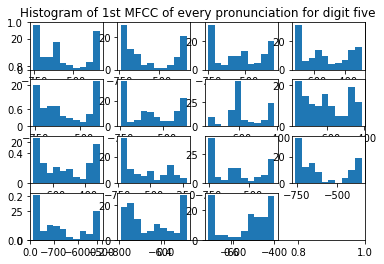

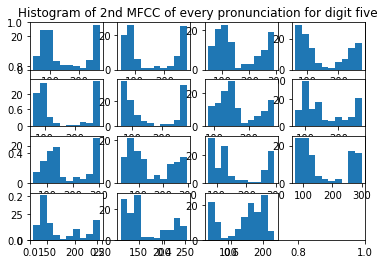

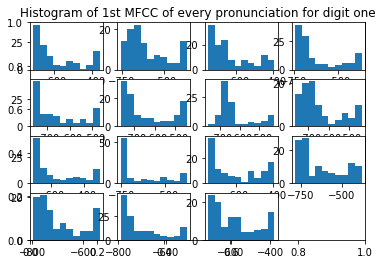

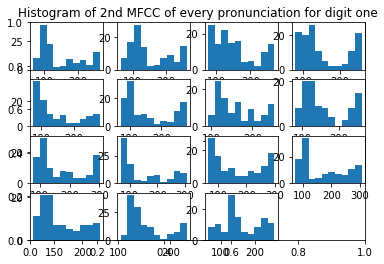

In [0]:
#step 4

#from Chardouvelis the last digits are both 0 and Parellis'are both 5, so we take 5 and 1(-> third from the end) I guess?
n=['five', 'one']

start=[]
end=[]
#plotting the histogramms of the 1st and 2nd MFCC of the above digits
for i in range(2):
  start.append(digits.index(n[i]))
  end.append(len(digits) - 1 - digits[::-1].index(n[i]))
  #for the 1st characteristic
  fig=plt.figure()
  plt.title("Histogram of 1st MFCC of every pronunciation for digit "+ n[i])
  for j in range(start[i], end[i]+1):    
      fig.add_subplot(4,4,j-start[i]+1)
      plt.hist(mfccs[j][0])
  #for the 2nd characteristic
  fig=plt.figure()
  plt.title("Histogram of 2nd MFCC of every pronunciation for digit "+ n[i])
  for j in range(start[i], end[i]+1):    
      fig.add_subplot(4,4,j-start[i]+1)
      plt.hist(mfccs[j][1])

#step four is  being continued in the next cell

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=8fdf5c207d5ff3f132d87f5c42f97ce9c5f63c69ab00f53dc23a77d4b411018e
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


Text(0.5, 1.05, 'MFCC for one from 2nd speaker')

<Figure size 432x288 with 0 Axes>

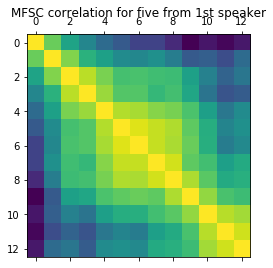

<Figure size 432x288 with 0 Axes>

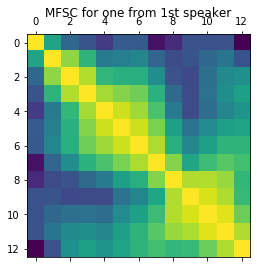

<Figure size 432x288 with 0 Axes>

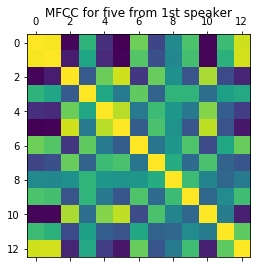

<Figure size 432x288 with 0 Axes>

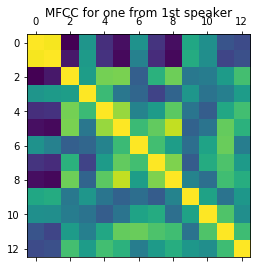

<Figure size 432x288 with 0 Axes>

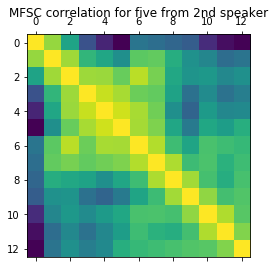

<Figure size 432x288 with 0 Axes>

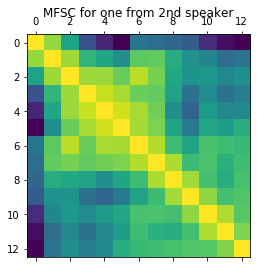

<Figure size 432x288 with 0 Axes>

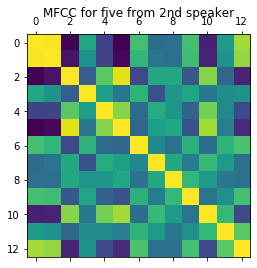

<Figure size 432x288 with 0 Axes>

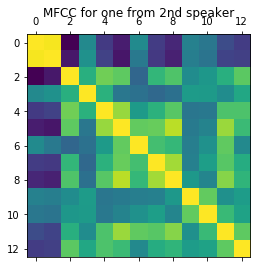

In [0]:

#library used to calculate the MFSCs
!pip install python_speech_features
from python_speech_features import logfbank #Compute log Mel-filterbank energy features from an audio signal.

mfscs=[]
#calculating Mel Filterbank Spectral Coefficients
for i in wav:
  mfscs.append(librosa.feature.melspectrogram(y=i[0], sr=16000, hop_length=int(0.01*1600), n_fft=int(0.025*16000)))

#transpose gia na paroume correlation anamesa se kathe suntelesth
#keeping only the first 13 characteristics as with the MFCCs
df1=(pd.DataFrame(logfbank(wav[start[0]][0]).T[:13,:])).T
df2=pd.DataFrame(logfbank(wav[start[1]][0]).T[:13,:]).T
df3=pd.DataFrame(mfccs[start[0]]).T
df4=pd.DataFrame(mfccs[start[1]]).T

#plotting the correlation matrixes
plt.figure()
plt.matshow(df1.corr())
plt.title("MFSC correlation for five from 1st speaker")

plt.figure()
plt.matshow(df2.corr())
plt.title("MFSC for one from 1st speaker")
plt.figure()
plt.matshow(df3.corr())
plt.title("MFCC for five from 1st speaker")
plt.figure()
plt.matshow(df4.corr())
plt.title("MFCC for one from 1st speaker")


#transpose gia na paroume correlation anamesa se kathe suntelesth
#keeping only the first 13 characteristics as with the MFCCs
df1=(pd.DataFrame(logfbank(wav[start[0]+1][0])[:13,:])).T
df2=pd.DataFrame(logfbank(wav[start[0]+1][0])[:13,:]).T
df3=pd.DataFrame(mfccs[start[0]+1]).T
df4=pd.DataFrame(mfccs[start[1]+1]).T

#plotting the correlation matrixes
plt.figure()
plt.matshow(df1.corr())
plt.title("MFSC correlation for five from 2nd speaker")
plt.figure()
plt.matshow(df2.corr())
plt.title("MFSC for one from 2nd speaker")
plt.figure()
plt.matshow(df3.corr())
plt.title("MFCC for five from 2nd speaker")
plt.figure()
plt.matshow(df4.corr())
plt.title("MFCC for one from 2nd speaker")


(133, 13, 6)


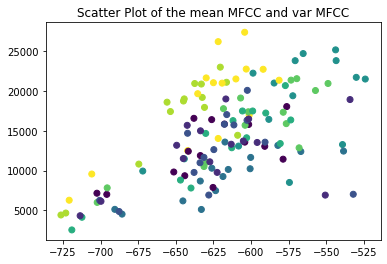

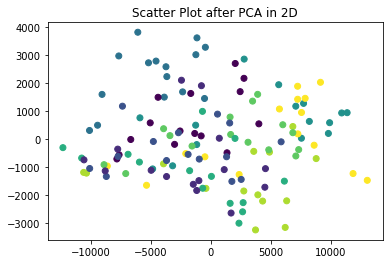

Ratio of the variance of the first 3 principal dimensions in relation with the initial variance:  [0.93319456 0.06126316 0.00554229]


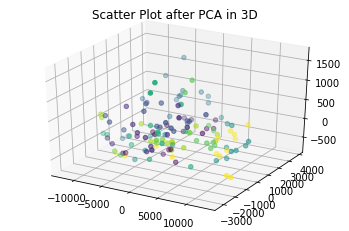

In [0]:
#step 5

features=[]
concatenated=[]
features_meanmfcc=[]
features_meandelta=[]
features_meandelta2=[]
features_varmfcc=[]
features_vardelta=[]
features_vardelta2=[]
#combining mfccs, deltas & delta-deltasfor each audiofile
for i in range(len(wav)):
  features_meanmfcc.append(np.mean(mfccs[i],axis=1))
  features_meandelta.append(np.mean(delta1[i],axis=1))
  features_meandelta2.append(np.mean(delta2[i],axis=1))
  features_varmfcc.append(np.var(mfccs[i],axis=1))
  features_vardelta.append(np.var(delta1[i],axis=1))
  features_vardelta2.append(np.var(delta2[i],axis=1))
  features.append(np.stack((features_meanmfcc[i],features_meandelta[i],features_meandelta2[i],features_varmfcc[i],features_vardelta[i],features_vardelta2[i]),axis=-1))

#features append the concatenated 
print(np.array(features).shape)
#scatter plot
features=np.array(features)
x= features[:,0,0]
y= features[:,0,3]
palette=[1,2,3,4,5,6,7,8,9]
palette_names=['one','two','three','four','five','six','seven','eight','nine']
#print(digits)
colours=[palette[i-1] for j in digits for i in palette if palette_names[i-1]==str(j)]
#print(colours)
#for each label choose a different colour
#used the same symbol, sorry
plt.title("Scatter Plot of the mean MFCC and var MFCC")
plt.scatter(x, y,c=colours)
plt.show()

#step 6
features = features.reshape(len(wav),13*6)

from sklearn.decomposition import PCA
#pca for 2 dimensions
pca = PCA(n_components=2)
pca.fit(features)
PCA(n_components=2)
features_pca=pca.transform(features)

#scatter plot for 2d

x= features_pca[:,0]
y= features_pca[:,1]
colours=[palette[i-1] for j in digits for i in palette if palette_names[i-1]==str(j)]
plt.title("Scatter Plot after PCA in 2D")
plt.scatter(x, y,c=colours)
plt.show()

#pca for 3 dimensions
pca = PCA(n_components=3)
pca.fit(features)
PCA(n_components=3)
features_pca=pca.transform(features)
x= features_pca[:,0]
y= features_pca[:,1]
z= features_pca[:,2]
#scatter plot for 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("Scatter Plot after PCA in 3D")
ax.scatter(x, y, z, c=colours)

#check variance
ex_variance=np.var(features_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print ("Ratio of the variance of the first 3 principal dimensions in relation with the initial variance: ", ex_variance_ratio) 

In [0]:
#step 7
import random
import math
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_files
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal
import sklearn.metrics
from sklearn.model_selection import train_test_split

thisdict =	{
  1: 'one',
  2: 'two',
  3: 'three',
  4: 'four',
  5: 'five',
  6: 'six',
  7: 'seven',
  8: 'eight',
  9: 'nine',
}
####################################################################
class NaiveBayesianClassifier(BaseEstimator, ClassifierMixin):  #as implemented in the lab time with a few alterations to match our dataset

    def __init__(self):
        self.Sigma = None
        self.apriori = None
        self.P = None
        self.X_2 = None
    def fit(self, X, y):
      n_samples,n_features=X.shape
      self.X_2=np.concatenate((np.array([y]).T,X),axis=1)
      self.apriori=[ (self.X_2[self.X_2[:,0]==i, :]).shape[0]/n_samples for i in ['one','two','three','four','five','six','seven','eight','nine'] ]


      #diagonal covariance matrix for every label
      self.Sigma=[]
      #some values are 0 (thus smoothing is required)
      smoothing=1e-09
      
      for l in range(9):
        a = np.zeros((n_features,n_features))
        np.fill_diagonal(a,[x + smoothing for x in variances[l]])
        self.Sigma.append(a)

      return self

    def predict(self, X):
      self.P=np.zeros((X.shape[0],9))
      for l in range (9):
        self.P[:,l]=multivariate_normal.logpdf(X,mean=means[l],cov=self.Sigma[l])+np.log(self.apriori[l])
      y_pred=(np.argmax(self.P,axis=1))
      return y_pred
    
    def score(self, X, y):
      pr2=[]
      for i in self.predict(X):
        pr2.append(thisdict.get(i+1))
      acc = sklearn.metrics.accuracy_score(pr2,y)
      return acc
##########################################################################
#for bonus later
mean_zcr=[]
var_zcr=[]
total_zcr=[]
for i in range(len(zcr)):
  mean_zcr.append(np.mean(zcr[i],axis=1))
  var_zcr.append(np.var(zcr[i],axis=1))
  total_zcr.append(np.stack((mean_zcr[i],var_zcr[i]),axis=-1))

total_zcr=(np.array(total_zcr)).reshape(len(zcr), 2)

features_2=np.concatenate((features, total_zcr), axis=1)

normf2 = preprocessing.normalize(features_2, axis=0) #isws oxi axis 0?

#######################################################################

normf = preprocessing.normalize(features, axis=0) #isws oxi axis 0?

X_train, X_test, y_train, y_test = train_test_split(normf, digits, test_size = 0.3, random_state=21)

y_X=np.concatenate((np.array([y_train]).T,X_train),axis=1)

digits2=[]
means=[]
variances=[]
for i in ['one','two','three','four','five','six','seven','eight','nine']:
    #select digits with label i
    digits2=(y_X[y_X[:,0]==i, :])
    digits2=np.delete(digits2, 0, axis=1)
    digits2=digits2.astype(float)
    temp = np.mean(digits2[:][1:],axis=0)
    means.append(temp)
    temp = np.var(digits2[:][1:],axis=0)
    variances.append(temp)



bc = NaiveBayesianClassifier()
bc.fit(X_train, y_train)
score = bc.score(X_test, y_test)
print("Score with Bayes estimator is")
print(score)


from sklearn.naive_bayes import GaussianNB

clf_b = GaussianNB()
clf_b.fit((X_train), y_train)
y_pred_scikit=clf_b.predict(X_test)
scikit_score=sklearn.metrics.accuracy_score(y_pred_scikit,y_test)
print("Score with scikit Bayes estimator is")
print(scikit_score)

from sklearn.gaussian_process import GaussianProcessClassifier

clf_GPC = GaussianProcessClassifier()
clf_GPC.fit(X_train, y_train)
y_pred_GPC = clf_GPC.predict(X_test)
score_GPC = sklearn.metrics.accuracy_score(y_pred_GPC,y_test)
print("GPC score is")
print(score_GPC)

from sklearn.neighbors import KNeighborsClassifier
clf_3nn = KNeighborsClassifier(n_neighbors=3)
clf_3nn.fit(X_train, y_train)
y_pred_nn = clf_3nn.predict(X_test)
score_nn = sklearn.metrics.accuracy_score(y_pred_nn,y_test)
print("3NN score is")
print(score_nn)

from sklearn import svm

clf_svm = svm.SVC(gamma='scale',kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm=clf_svm.predict(X_test)
svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
print("SVM rbf score is")
print(svm_score)
#########################################################################################
#repeat for bonus
print()
print("After adding Zero Crossing Rate")

X_train, X_test, y_train, y_test = train_test_split(normf2, digits, test_size = 0.3, random_state=21)

y_X=np.concatenate((np.array([y_train]).T,X_train),axis=1)

digits2=[]
means=[]
variances=[]
for i in ['one','two','three','four','five','six','seven','eight','nine']:
    #select digits with label i
    digits2=(y_X[y_X[:,0]==i, :])
    digits2=np.delete(digits2, 0, axis=1)
    digits2=digits2.astype(float)
    temp = np.mean(digits2[:][1:],axis=0)
    means.append(temp)
    temp = np.var(digits2[:][1:],axis=0)
    variances.append(temp)



bc = NaiveBayesianClassifier()
bc.fit(X_train, y_train)
score = bc.score(X_test, y_test)
print("Score with Bayes estimator is")
print(score)


from sklearn.naive_bayes import GaussianNB

clf_b = GaussianNB()
clf_b.fit((X_train), y_train)
y_pred_scikit=clf_b.predict(X_test)
scikit_score=sklearn.metrics.accuracy_score(y_pred_scikit,y_test)
print("Score with scikit Bayes estimator is")
print(scikit_score)

from sklearn.gaussian_process import GaussianProcessClassifier

clf_GPC = GaussianProcessClassifier()
clf_GPC.fit(X_train, y_train)
y_pred_GPC = clf_GPC.predict(X_test)
score_GPC = sklearn.metrics.accuracy_score(y_pred_GPC,y_test)
print("GPC score is")
print(score_GPC)

from sklearn.neighbors import KNeighborsClassifier
clf_3nn = KNeighborsClassifier(n_neighbors=3)
clf_3nn.fit(X_train, y_train)
y_pred_nn = clf_3nn.predict(X_test)
score_nn = sklearn.metrics.accuracy_score(y_pred_nn,y_test)
print("3NN score is")
print(score_nn)

from sklearn import svm

clf_svm = svm.SVC(gamma='scale',kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm=clf_svm.predict(X_test)
svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
print("SVM rbf score is")
print(svm_score)


Score with Bayes estimator is
0.6
Score with scikit Bayes estimator is
0.675
GPC score is
0.125
3NN score is
0.375
SVM rbf score is
0.125

After adding Zero Crossing Rate
Score with Bayes estimator is
0.7
Score with scikit Bayes estimator is
0.8
GPC score is
0.15
3NN score is
0.4
SVM rbf score is
0.15


RNN(
  (rnn): RNN(1, 36, batch_first=True)
  (out): Linear(in_features=36, out_features=1, bias=True)
)
tensor(0.5582, grad_fn=<MseLossBackward>)
tensor(0.7068, grad_fn=<MseLossBackward>)
tensor(0.5503, grad_fn=<MseLossBackward>)
tensor(0.6156, grad_fn=<MseLossBackward>)
tensor(0.4255, grad_fn=<MseLossBackward>)
tensor(0.4506, grad_fn=<MseLossBackward>)
tensor(0.1429, grad_fn=<MseLossBackward>)
tensor(1.3530, grad_fn=<MseLossBackward>)
tensor(0.9680, grad_fn=<MseLossBackward>)
tensor(0.3430, grad_fn=<MseLossBackward>)
tensor(0.4650, grad_fn=<MseLossBackward>)
tensor(0.4994, grad_fn=<MseLossBackward>)
tensor(0.5065, grad_fn=<MseLossBackward>)
tensor(0.4906, grad_fn=<MseLossBackward>)
tensor(0.4986, grad_fn=<MseLossBackward>)
tensor(0.4573, grad_fn=<MseLossBackward>)
tensor(0.4408, grad_fn=<MseLossBackward>)
tensor(0.3873, grad_fn=<MseLossBackward>)
tensor(0.3590, grad_fn=<MseLossBackward>)
tensor(0.3615, grad_fn=<MseLossBackward>)
tensor(0.3853, grad_fn=<MseLossBackward>)
tensor(0.2507,

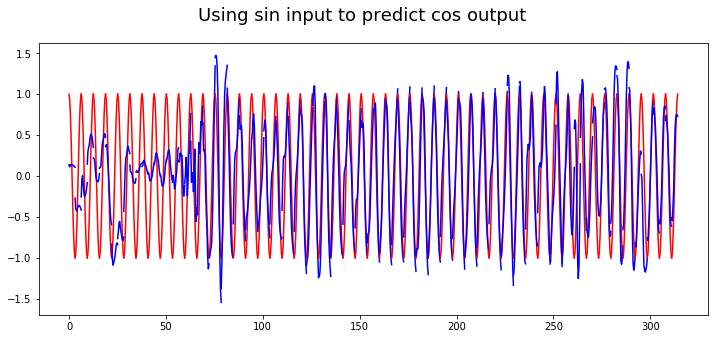

In [0]:
#step 8

import torch
from torch import nn

TIME_STEP = 10 # rnn time step
INPUT_SIZE = 1 # rnn input size
LR = 0.02 # learning rate
'''steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)'''

h_size = 36

class RNN(nn.Module):
 def __init__(self):
  super(RNN, self).__init__()
  self.rnn = nn.RNN(
  input_size=INPUT_SIZE,
  hidden_size=h_size, # rnn hidden unit
  num_layers=1, # number of rnn layer
  batch_first=True, # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
  )
  self.out = nn.Linear(h_size, 1)
 def forward(self, x, h_state):
  r_out, h_state = self.rnn(x, h_state)
  outs = []
  for time_step in range(r_out.size(1)): # calculate output for each time step
    outs.append(self.out(r_out[:, time_step, :]))
  return torch.stack(outs, dim=1), h_state

rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR) # optimize all nn parameters
loss_func = nn.MSELoss()
h_state = None 
plt.figure(2, figsize=(12, 5))
plt.suptitle('Using sin input to predict cos output',fontsize='18')
plt.ion()
for step in range(100):
 start, end = step * np.pi, (step+1)*np.pi # time range
 steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
 x_np = np.sin(steps) 
 y_np = np.cos(steps)
 x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis]) # shape (batch, time_step, input_size)
 y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
 prediction, h_state = rnn(x, h_state) # rnn output
 h_state = h_state.data 
 loss = loss_func(prediction, y) # cross entropy loss
 print(loss)
 optimizer.zero_grad() # clear gradients 
 loss.backward() # backpropagation
 optimizer.step()
 plt.plot(steps, y_np.flatten(), 'r-')
 plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
 '''plt.draw()
 plt.pause(0.1)
plt.ioff()
plt.show()'''

In [0]:
#step 9

# 2 - Data Extraction
# get data from our drive, where we uploaded it
data_extract = "/content/drive/My Drive/recordings.zip"
zip_ref = zipfile.ZipFile(data_extract , 'r').extractall()


In [0]:
import os
import numpy as np
import librosa
from glob import glob

from sklearn.preprocessing import StandardScaler

#parsing function -> divide in train & test

def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    print(files)
    fnames = [f.split('/')[1].split('.')[0].split('_') for f in files]
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [0]:

#use function to parse our data from the local directory 'recordings'
dir='recordings'
X_train, X_test, y_train, y_test, spk_train, spk_test = parser(dir)


['recordings/3_theo_11.wav', 'recordings/5_jackson_14.wav', 'recordings/5_nicolas_37.wav', 'recordings/6_jackson_3.wav', 'recordings/6_yweweler_21.wav', 'recordings/6_yweweler_35.wav', 'recordings/6_theo_47.wav', 'recordings/3_nicolas_10.wav', 'recordings/7_nicolas_7.wav', 'recordings/9_yweweler_32.wav', 'recordings/8_theo_43.wav', 'recordings/4_yweweler_12.wav', 'recordings/4_yweweler_45.wav', 'recordings/3_yweweler_8.wav', 'recordings/3_yweweler_12.wav', 'recordings/2_nicolas_17.wav', 'recordings/7_theo_31.wav', 'recordings/8_nicolas_7.wav', 'recordings/9_jackson_47.wav', 'recordings/4_jackson_42.wav', 'recordings/1_jackson_16.wav', 'recordings/2_yweweler_23.wav', 'recordings/4_nicolas_43.wav', 'recordings/5_theo_28.wav', 'recordings/3_theo_3.wav', 'recordings/5_jackson_8.wav', 'recordings/0_yweweler_34.wav', 'recordings/1_yweweler_10.wav', 'recordings/7_jackson_26.wav', 'recordings/9_nicolas_5.wav', 'recordings/2_theo_37.wav', 'recordings/0_jackson_2.wav', 'recordings/0_yweweler_47.

In [0]:

from sklearn.model_selection import StratifiedShuffleSplit

#divide the training data in training and validation
#we use StratifiedShuffleSplit to get same number of different digits in the 
#new resulting datasets

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
y=y_train
y=np.array(y).reshape((1800,1))
X=np.zeros(1800)
X_train_copy=np.array(X_train)
sss.get_n_splits(X, y)
for train_index, validation_index in sss.split(X, y):
  X_train, X_val = X_train_copy[train_index], X_train_copy[validation_index]
  y_train, y_val = y[train_index], y[validation_index]


In [0]:
#installing the pomegranate for step 10
!pip install pomegranate --upgrade


     |████████████████████████████████| 5.6MB 7.1MB/s 


In [0]:
#step 10 - 12

from pomegranate import *
from sklearn.metrics import accuracy_score

#initializing optimal values for our gridsearch
n_states_opt = 1     
num_mixtures_opt = 2 
acc_opt = 0
mod_opt = []
y_pred_opt = []

#we test all different parameters and save the one with the better score on our validation set

for n_states in range(1,4):       # the number of HMM states
  for num_mixtures in range(2,6): # the number of Gaussians
  #we pick all the parameters suitable so that there is no fatal error
  #as seen on the git support, sometimes there's an error but the program still runs and the model's fine


    model=[]
    #we repeat the process 10 times, once for each digit so we get models for each digit
    for num in range(10):
      X_1=[]
      data=[]
      for i in range(len(X_train)):
        if (y_train[i]==num):
          data.append(X_train[i])
          for j in X_train[i]:
            X_1.append(j)
            #in X_1 we get all the MFCC frames in the specific num
         
      
      gmm = True # whether to use GMM or plain Gaussian
      dists = [] # list of probability distributions for the HMM states

      for i in range(n_states):
          if gmm:
              a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, num_mixtures, np.array(X_1)) #ΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑΑ
          else:
              a = MultivariateGaussianDistribution.from_samples(X)
          dists.append(a)

      #we define our transition matrix as described in the exercise
      trans_mat = [] # your transition matrix
      starts = [1.0] + (n_states-1)*[0] #ex [1.0,0,0] # your starting probability matrix
      ends = (n_states-1)*[0] + [1/2] #ex [0, 0, 1/2] # your ending probability matrix (emission probability)
      for index in range(n_states-1):
        trans_mat.append( index * [0] + 2 * [1/2] + max(0, n_states-2-index) * [0])
      trans_mat.append(ends)

      #data = X_train.tolist() # your data: must be a Python list that contains: 2D lists with the sequences (so its dimension would be num_sequences x seq_length x feature_dimension)
      #print(np.array(data).shape)          # But be careful, it is not a numpy array, it is a Python list (so each sequence can have different length)

      # Define the GMM-HMM
      #we append the model for each different digit
      model.append(HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)]))
      #we fit the last appended model using the EM method
      model[-1].fit(data,  max_iterations=50)

    #test in validation to find the best
    '''
    print(n_states, "HMM States")
    print(num_mixtures, "Gaussians")
    print()
    '''
    #we get our predictions from the validation set
    #by predicting the digit with the biggest possibility
    y_pred=[]
    for sample in X_val:
      logp=np.zeros(10)
      for ii in range(10):
        logp[ii] = model[ii].viterbi(sample)[0]     
      y_pred.append(np.argmax(logp))
    #calculate accuracy and if we get better results, we replace our optimal solutions
    acc = accuracy_score(y_val, y_pred)
    if (acc > acc_opt):
      acc_opt=acc
      model_opt = model
      n_states_opt = n_states
      num_mixtures_opt = num_mixtures
      y_pred_opt = y_pred

#print parameters for optmal results
"""
As said in the issue #15 in github, sometimes an error occurs due to
an exception caused by the changes in numpy after the 1.7 edition.
Nevertheless, the code keeps running and the models are fitted, 
so just ignore it.
"""
print("Optimal results by testing on validation set:")
print(n_states_opt, "HMM States")
print(num_mixtures_opt, "Gaussians")
print("Accuracy: ", acc_opt)


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Optimal results by testing on validation set:
3 HMM States
5 Gaussians
Accuracy:  0.9777777777777777


In [0]:
print("Optimal results by testing on validation set with parameters:")
print(n_states_opt, "HMM States")
print(num_mixtures_opt, "Gaussians")
print("Accuracy: ", acc_opt)

Optimal results by testing on validation set with parameters:
3 HMM States
5 Gaussians
Accuracy:  0.9777777777777777


In [0]:
#step 12

from sklearn.metrics import confusion_matrix

cm_val=confusion_matrix(y_val,y_pred_opt)
print("Accuracy for val set: ", acc_opt)

#find the accuracy score in the Test Dataset
y_pred=[]
for sample in X_test:
  logp=np.zeros(10)
  for i in range(10):
    logp[i] = model[i].viterbi(sample)[0]
  y_pred.append(np.argmax(logp))
cm_test=confusion_matrix(y_test,y_pred)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy for test set: ", acc)

Accuracy for val set:  0.9777777777777777
Accuracy for test set:  0.97


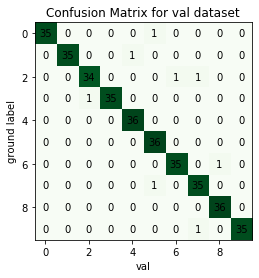

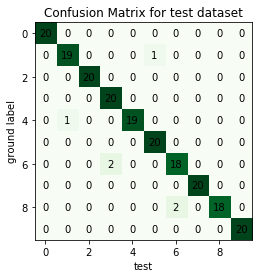

In [0]:
#step 13
#form the confusion matixes that were computed in the previous step
models = [cm_val , cm_test]
names = ['val', 'test']
for m in range(2):
  plt.imshow(models[m],interpolation = 'nearest',cmap = 'Greens')
  for (i, j), z in np.ndenumerate(models[m]):
    plt.text(j, i, z, ha='center', va='center')
  plt.title("Confusion Matrix for " + names[m] + " dataset")
  plt.xlabel(names[m])
  plt.ylabel("ground label")
  plt.show()

In [0]:
#Vima 14

import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F


class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels):
      
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        self.lengths = [x.shape[0] for x in feats ]
        self.feats = self.zero_pad_and_stack(feats)
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        

        feat=x[0].shape[1]
        pad=max(self.lengths)
        padded=np.zeros((len(x),pad,feat))

        for ctr,k in enumerate(x):
          padded[ctr,:len(k),:] = k

        return padded

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers,drop_prob=0.4, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.direction = 2 if self.bidirectional else 1
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.input_dim = input_dim
        self.rnn_size = rnn_size
        #lstm initialization
        self.lstm = nn.LSTM(input_dim,self.rnn_size, num_layers, dropout=drop_prob, batch_first=True, bidirectional=self.bidirectional)
        self.dropout = nn.Dropout(drop_prob)
        #linear layer /output_dimension=number of classes(10)
        self.fc = nn.Linear(self.feature_size, output_dim)

        
        # Initialize the LSTM, Dropout, Output layers
        

      
    def forward(self, x, lengths,hidden):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

        lstm_out, hidden = self.lstm(x, hidden)
        batch_size=x.shape[0]
        lstm_out = lstm_out.contiguous().view(batch_size,-1, self.feature_size)
        out = self.fc(lstm_out)
        #get last output for each sequence 
        last_outputs = self.last_timestep(out,lengths,self.bidirectional)
        return last_outputs,hidden

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)
  

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        new_lengths=np.array([length-1 for length in lengths])
        idx = (torch.from_numpy(new_lengths)).view(-1, 1)
        idx = idx.expand(outputs.size(0),outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

    def init_hidden(self, batch_size):
        #initialize hidden size 
        weight = next(self.parameters()).data
        hidden = (weight.new(self.direction*self.num_layers, batch_size, self.rnn_size).zero_(),
                      weight.new(self.direction*self.num_layers, batch_size, self.rnn_size).zero_())
        return hidden



Epoch: 1/25... Step: 45... Train Loss: 1.523015...
Epoch: 2/25... Step: 90... Train Loss: 1.043854...
Validation loss decreased (inf --> 1.022409).  Saving model ...
Epoch: 3/25... Step: 135... Train Loss: 0.963597...
Epoch: 4/25... Step: 180... Train Loss: 1.130014...
Validation loss decreased (1.022409 --> 0.784190).  Saving model ...
Epoch: 5/25... Step: 225... Train Loss: 0.540309...
Epoch: 6/25... Step: 270... Train Loss: 0.521170...
Validation loss decreased (0.784190 --> 0.559199).  Saving model ...
Epoch: 7/25... Step: 315... Train Loss: 0.550494...
Epoch: 8/25... Step: 360... Train Loss: 0.365985...
Validation loss decreased (0.559199 --> 0.339381).  Saving model ...
Epoch: 9/25... Step: 405... Train Loss: 0.240324...
Epoch: 10/25... Step: 450... Train Loss: 0.150147...
Epoch: 11/25... Step: 495... Train Loss: 0.213998...
Validation loss decreased (0.339381 --> 0.294811).  Saving model ...
Epoch: 12/25... Step: 540... Train Loss: 0.456807...
Epoch: 13/25... Step: 585... Train 

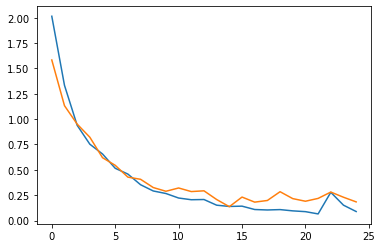

In [0]:


batch_size=32
train_data = FrameLevelDataset(X_train,y_train.flatten().tolist())

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_data = FrameLevelDataset(X_val,y_val.flatten().tolist())
val_loader = DataLoader(val_data,shuffle=True,batch_size= batch_size,drop_last=True) 

lengths=FrameLevelDataset(X_train,y_train).lengths

output_dim = 10
rnn_size = 18
num_layers = 2
input_dim=6
counter=0
model = BasicLSTM(input_dim,rnn_size,output_dim,num_layers)

lr=0.005
#criterion = nn.NLLLoss()
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-2,momentum=0.9)
epochs = 25
new_epochs=epochs
patience = 5
stop_counter=0
print_every = 100
valid_loss_min = np.Inf
loss_values_train = []
loss_values_val = []
model.train()
flag=0

for i in range(epochs):
    running_loss_train=0.0
    running_loss_val=0.0
    h = model.init_hidden(batch_size)
    train_losses=[]
    for inputs, labels,lengths in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        model.zero_grad()
        output, h = model(inputs.float(),lengths,h)
        loss = criterion(output.squeeze(), labels.long())
        running_loss_train =+ loss.item() * batch_size
        train_losses.append(loss.item())
    
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        if counter%print_every == 0:
          val_h = model.init_hidden(batch_size)
          val_losses = []
          model.eval()
          for inp, lab,lens in val_loader:
              val_h = tuple([each.data for each in val_h])
              out, val_h = model(inp.float(),lens, val_h)
              val_loss = criterion(out.squeeze(), lab.long())
              val_losses.append(val_loss.item())
              #running_loss_val=+ val_loss.item() * batch_size
          model.train()

          if np.mean(val_losses) <= valid_loss_min:
              stop_counter=0
              torch.save(model.state_dict(), './state_dict.pt')
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
              #early stopping here
              valid_loss_min = np.mean(val_losses)
          else:
              stop_counter+=1
              if (stop_counter>=patience):
                new_epochs=i
                print('I got in')
                flag=1

    model.eval()
    val_h = model.init_hidden(batch_size) 
    validation_losses=[]
    for inp, lab,lens in val_loader:
              val_h = tuple([each.data for each in val_h])
              out, val_h = model(inp.float(),lens, val_h)
              val_loss = criterion(out.squeeze(), lab.long())
              validation_losses.append(val_loss.item())
              running_loss_val=+ val_loss.item() * batch_size
              
    model.train()
    print("Epoch: {}/{}...".format(i+1, epochs),
            "Step: {}...".format(counter),
            "Train Loss: {:.6f}...".format(loss.item()))
    if (flag):
      break
    loss_values_train.append(np.mean(train_losses))
    loss_values_val.append(np.mean(validation_losses))    
plt.plot(range(new_epochs),loss_values_train)
plt.plot(range(new_epochs),loss_values_val)



Test set: Average loss: 0.157976, Accuracy: 190/200 (95%)


Validation set: Average loss: 0.150924, Accuracy: 349/360 (97%)



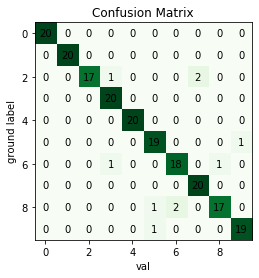

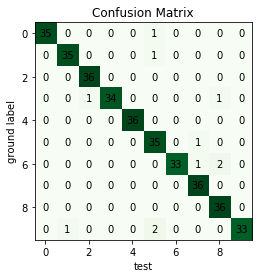

In [0]:
from sklearn.metrics import confusion_matrix
def evaluate_model():
  model.load_state_dict(torch.load('./state_dict.pt'))
  batch_size=20
  test_data=FrameLevelDataset(X_test,y_test)
  test_loader = DataLoader(test_data, shuffle=False, batch_size=20)
  validation_data=FrameLevelDataset(X_val,y_val.flatten().tolist())
  validation_loader = DataLoader(validation_data, shuffle=False, batch_size=20)

  test_losses = []
  validation_losses = []
  num_correct = 0
  h = model.init_hidden(batch_size)
  correct=0
  y_pred_test=[]
  y_pred_val=[]

  model.eval()
  for inputs, labels,lengths in test_loader:
      h = tuple([each.data for each in h])
      output, h = model(inputs.float(),lengths, h)
      test_loss = criterion(output.squeeze(), labels.long())
      test_losses.append(test_loss.item())
      pred = output.data.max(1)[1]  # get the index of the max log-probability
      y_pred_test.append(pred.tolist())
      correct += pred.eq(labels.data).sum()

  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          np.mean(test_losses), correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
  
  correct=0
  num_correct=0
  h = model.init_hidden(batch_size)

  for inputs, labels,lengths in validation_loader:
      h = tuple([each.data for each in h])
      output, h = model(inputs.float(),lengths, h)
      validation_loss = criterion(output.squeeze(), labels.long())
      validation_losses.append(validation_loss.item())
      pred = output.data.max(1)[1]  # get the index of the max log-probability
      y_pred_val.append(pred.tolist())
      correct += pred.eq(labels.data).sum()

  validation_loss /= len(validation_loader.dataset)
  print('\nValidation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          np.mean(validation_losses), correct, len(validation_loader.dataset),
          100. * correct / len(validation_loader.dataset)))
  #confusion matrices
  cm1=confusion_matrix(y_test,np.array(y_pred_test).flatten())
  cm2=confusion_matrix(y_val,np.array(y_pred_val).flatten())

  models = [cm1 , cm2]
  names = ['val', 'test']
  for m in range(2):
    plt.imshow(models[m],interpolation = 'nearest',cmap = 'Greens')
    for (i, j), z in np.ndenumerate(models[m]):
      plt.text(j, i, z, ha='center', va='center')
    plt.title("Confusion Matrix")
    plt.xlabel(names[m])
    plt.ylabel("ground label")
    plt.show()
  
evaluate_model()





Epoch: 1/45... Step: 45... Train Loss: 1.149151...
Epoch: 2/45... Step: 90... Train Loss: 0.609564...
Validation loss decreased (inf --> 0.643054).  Saving model ...
Epoch: 3/45... Step: 135... Train Loss: 0.304978...
Epoch: 4/45... Step: 180... Train Loss: 0.402662...
Validation loss decreased (0.643054 --> 0.336566).  Saving model ...
Epoch: 5/45... Step: 225... Train Loss: 0.251010...
Epoch: 6/45... Step: 270... Train Loss: 0.166067...
Validation loss decreased (0.336566 --> 0.192793).  Saving model ...
Epoch: 7/45... Step: 315... Train Loss: 0.303905...
Epoch: 8/45... Step: 360... Train Loss: 0.218397...
Validation loss decreased (0.192793 --> 0.146733).  Saving model ...
Epoch: 9/45... Step: 405... Train Loss: 0.133580...
Epoch: 10/45... Step: 450... Train Loss: 0.066609...
Epoch: 11/45... Step: 495... Train Loss: 0.109645...
Epoch: 12/45... Step: 540... Train Loss: 0.205736...
Epoch: 13/45... Step: 585... Train Loss: 0.177286...
Validation loss decreased (0.146733 --> 0.120445). 

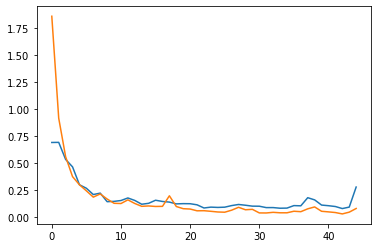

In [0]:
#bidirectional model initialization

batch_size=32
#train_data = TensorDataset(torch.from_numpy(FrameLevelDataset(X_train,y_train).feats), torch.from_numpy(FrameLevelDataset(X_train,y_train).feats))
train_data = FrameLevelDataset(X_train,y_train.flatten().tolist())

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
val_data = FrameLevelDataset(X_val,y_val.flatten().tolist())
val_loader = DataLoader(val_data,shuffle=True,batch_size= batch_size,drop_last=True) 

lengths=FrameLevelDataset(X_train,y_train).lengths

output_dim = 10
rnn_size = 16
num_layers = 2
input_dim=6
counter=0
model = BasicLSTM(input_dim,rnn_size,output_dim,num_layers,bidirectional=True)

lr=0.005
#criterion = nn.NLLLoss()
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-2,momentum=0.9)
epochs = 45
print_every = 100
valid_loss_min = np.Inf
loss_values_train = []
loss_values_val = []
model.train()
for i in range(epochs):
    train_losses=[]
    running_loss_train=0.0
    running_loss_val=0.0
    h = model.init_hidden(batch_size)
    
    for inputs, labels,lengths in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        model.zero_grad()
        output, h = model(inputs.float(),lengths,h)
        loss = criterion(output.squeeze(), labels.long())
        running_loss_train =+ loss.item() * batch_size
        train_losses.append(loss.item())
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        if counter%print_every == 0:
          val_h = model.init_hidden(batch_size)
          val_losses = []
          model.eval()
          for inp, lab,lens in val_loader:
              val_h = tuple([each.data for each in val_h])
              out, val_h = model(inp.float(),lens, val_h)
              val_loss = criterion(out.squeeze(), lab.long())
              val_losses.append(val_loss.item())
              #running_loss_val=+ val_loss.item() * batch_size
          model.train()

          if np.mean(val_losses) <= valid_loss_min:
              torch.save(model.state_dict(), './state_dict.pt')
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
              valid_loss_min = np.mean(val_losses)
    model.eval()
    val_h = model.init_hidden(batch_size) 
    for inp, lab,lens in val_loader:
              val_h = tuple([each.data for each in val_h])
              out, val_h = model(inp.float(),lens, val_h)
              val_loss = criterion(out.squeeze(), lab.long())
              val_losses.append(val_loss.item())
              running_loss_val=+ val_loss.item() * batch_size
    model.train()
    print("Epoch: {}/{}...".format(i+1, epochs),
            "Step: {}...".format(counter),
            "Train Loss: {:.6f}...".format(loss.item()))

    loss_values_train.append(np.mean(val_losses))
    loss_values_val.append(np.mean(train_losses))    
plt.plot(range(epochs),loss_values_train)
plt.plot(range(epochs),loss_values_val)




Test set: Average loss: 0.154444, Accuracy: 195/200 (98%)


Validation set: Average loss: 0.077564, Accuracy: 351/360 (98%)



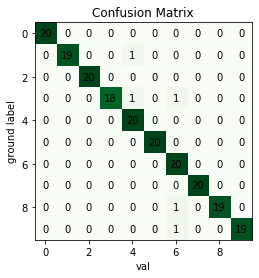

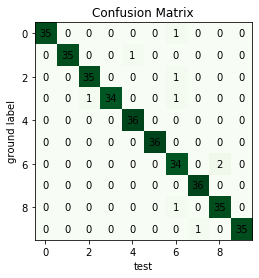

In [0]:
#evaluate bidirectional model
evaluate_model()